# Cifar10 dataset using CNN

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.constraints import MaxNorm

In [46]:
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten

In [9]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
# rescale image
xtrain_scaled = xtrain / 255.0
xtest_scaled = xtest / 255.0

Training:

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [11]:
model.fit(xtrain_scaled, ytrain, validation_data=(xtest_scaled, ytest), 
          callbacks=[callback], epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 292s 362ms/step - loss: 1.5726 - sparse_categorical_accuracy: 0.4358 - val_loss: 1.2158 - val_sparse_categorical_accuracy: 0.5681
Epoch 2/25
782/782 [==============================] - 284s 364ms/step - loss: 1.2099 - sparse_categorical_accuracy: 0.5717 - val_loss: 1.1197 - val_sparse_categorical_accuracy: 0.6101
Epoch 3/25
782/782 [==============================] - 265s 339ms/step - loss: 1.0963 - sparse_categorical_accuracy: 0.6100 - val_loss: 1.0160 - val_sparse_categorical_accuracy: 0.6490
Epoch 4/25
782/782 [==============================] - 266s 340ms/step - loss: 1.0314 - sparse_categorical_accuracy: 0.6333 - val_loss: 0.9615 - val_sparse_categorical_accuracy: 0.6605
Epoch 5/25
782/782 [==============================] - 259s 331ms/step - loss: 0.9796 - sparse_categorical_accuracy: 0.6533 - val_loss: 0.9304 - val_sparse_categorical_accuracy: 0.6768
Epoch 6/25
782/782 [==============================] - 405s 519ms/step - loss: 0.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

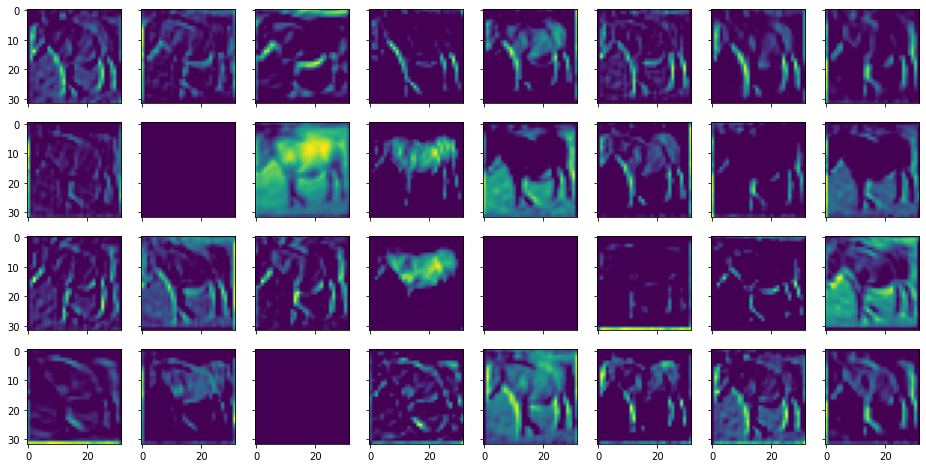

In [14]:
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(xtrain[7], 0))
 
# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]
 
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])
 
plt.show()

In [17]:
print(f"x_Train shape: {xtrain.shape}")
print(f"y_Train shape: {ytrain.shape}")
print(f"x_Test shape: {xtest.shape}")
print(f"y_Test shape: {ytest.shape}")

x_Train shape: (50000, 32, 32, 3)
y_Train shape: (50000, 1)
x_Test shape: (10000, 32, 32, 3)
y_Test shape: (10000, 1)


In [18]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
ytrain = ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
ytest = ytest.reshape(-1,)

In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

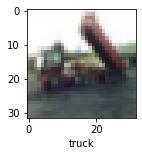

In [24]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
plot_sample(xtrain, ytrain, 2)

Text(0.5, 1.0, 'Distribution of class in training set')

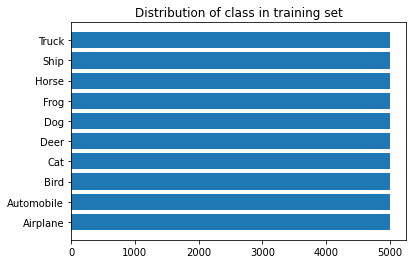

In [26]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(ytrain, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Distribution of class in training set')

Text(0.5, 1.0, 'Distribution of class in testing set')

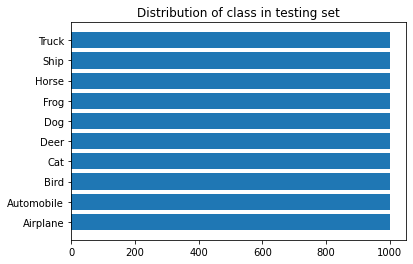

In [27]:
classes, counts = np.unique(ytest, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Distribution of class in testing set')

In [29]:
# Transform target variable into one-hotencoding
from tensorflow.keras.utils import to_categorical
y_Train = to_categorical(ytrain, 10)
y_Test = to_categorical(ytest, 10)


In [30]:
y_Train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [49]:
from tensorflow.keras import layers, models

In [50]:
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.9848 - accuracy: 0.4044
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2767 - accuracy: 0.5472
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1299 - accuracy: 0.6033
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0409 - accuracy: 0.6365
Epoch 5/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.9706 - accuracy: 0.6609
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9021 - accuracy: 0.6881
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8476 - accuracy: 0.7054
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7972 - accuracy: 0.7202
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7639 - accuracy: 0.7358
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [54]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 10ms/step - loss: 1.1832 - accuracy: 0.6349


[1.1832112073898315, 0.6348999738693237]

In [55]:
y_pred = model.predict(xtest)
y_pred[:5]

313/313 [==============================] - 4s 10ms/step


array([[7.4967637e-04, 1.9461934e-04, 7.8294461e-04, 8.5676914e-01,
        1.0103023e-03, 4.2477671e-02, 4.2395860e-02, 1.1124173e-02,
        4.4424038e-02, 7.1545328e-05],
       [1.9228635e-02, 1.0553962e-02, 1.2105359e-04, 4.5315746e-06,
        4.1652806e-06, 3.4977475e-08, 2.8990169e-07, 1.3307718e-08,
        9.6999365e-01, 9.3676244e-05],
       [1.4895209e-02, 1.7912168e-02, 1.3197247e-03, 5.1979320e-03,
        3.9691472e-04, 1.4710502e-04, 7.4936502e-04, 6.6447858e-05,
        9.3999368e-01, 1.9321494e-02],
       [7.1610445e-01, 2.8280896e-05, 2.3695312e-03, 2.5374295e-05,
        2.4017130e-04, 7.4689018e-07, 1.4497912e-06, 4.8218144e-06,
        2.8111064e-01, 1.1453414e-04],
       [6.9716471e-06, 2.6173861e-06, 1.4120447e-03, 4.1379076e-03,
        3.6346056e-03, 6.8609213e-04, 9.8997319e-01, 8.4980420e-05,
        3.1047082e-05, 3.0558804e-05]], dtype=float32)

In [56]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [57]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

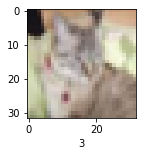

In [58]:
plot_sample(xtest, ytest,8)

In [59]:
classes[y_classes[8]]


3

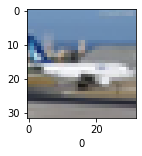

In [61]:
plot_sample(xtest, ytest, 90)

In [68]:
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(xtrain[16], 0))
 
# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]


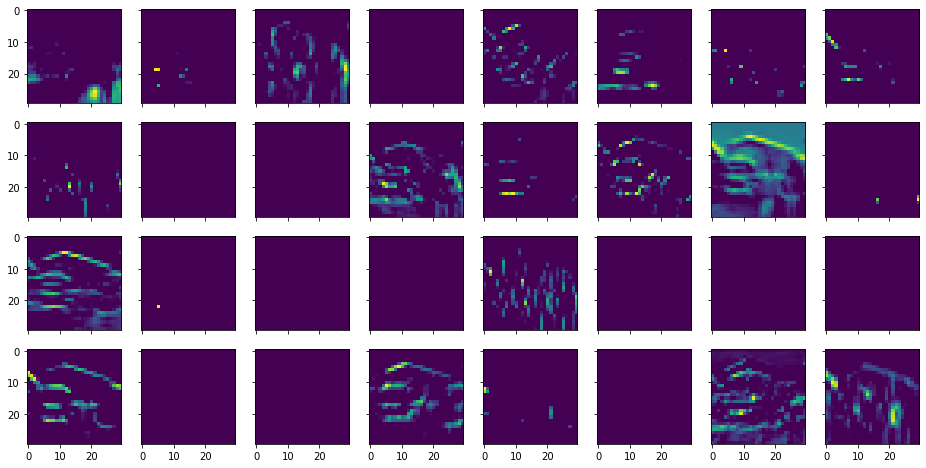

In [72]:
 
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0,32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])
 
plt.show()